In [4]:
from src.osm.container import OSMContainer
from src.osm.osm_clean import get_city
from src.constants import fn_city_poly_dc, fn_osm_db_dc, fn_osm_raw_dc, fn_city_poly_ph, fn_osm_db_ph, fn_osm_raw_ph
from src.osm.osmdb_create import build_db_from_osm


In [5]:
data_dir = 'data/'

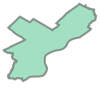

In [6]:
city_ph = get_city(data_dir+fn_city_poly_ph)
city_ph

# improve osm data cleaning: a polygon could be empty
add one rult to bad quality way: empty polygon. For example, in osm_raw_ph, this [way][1] is an empty polygon.

[1]: http://www.openstreetmap.org/way/352414117

In [7]:
osm_raw_ph = OSMContainer(data_dir + fn_osm_raw_ph)

begin reading osm 2017-01-11 15:43:40.269000
finish reading osm 2017-01-11 15:44:05.270000


In [8]:
print osm_raw_ph.get_osm_way_by_id(352414117)

from src.osm.osm2shp import way2lineOrpoly
shp = way2lineOrpoly(osm_raw_ph, osm_raw_ph.get_osm_way_by_id(352414117))
print shp.wkt
for nid in (109840225L, 3582123060L, 109840245L, 3582123060L, 109840225L):
    print osm_raw_ph.get_osm_node_by_id(nid)

Self-intersection at or near point -75.086348999999998 40.021465999999997


Way(id=352414117L, version=1, changeset=31831991, timestamp=1433809820, uid=624003, tags={u'amenity': u'school'}, nodes=(109840225L, 3582123060L, 109840245L, 3582123060L, 109840225L))
POLYGON EMPTY
Node(id=109840225L, version=2, changeset=3544057, timestamp=1262687838, uid=147510, tags={}, lon=-75.086349, lat=40.021466)
Node(id=3582123060L, version=1, changeset=31831991, timestamp=1433809818, uid=624003, tags={}, lon=-75.08573, lat=40.022097)
Node(id=109840245L, version=2, changeset=3544057, timestamp=1262687838, uid=147510, tags={}, lon=-75.085089, lat=40.022761)
Node(id=3582123060L, version=1, changeset=31831991, timestamp=1433809818, uid=624003, tags={}, lon=-75.08573, lat=40.022097)
Node(id=109840225L, version=2, changeset=3544057, timestamp=1262687838, uid=147510, tags={}, lon=-75.086349, lat=40.021466)


src\osm\osm2shp.py:32: UserWarning: way id=352414117 is not valid as a <class 'shapely.geometry.polygon.Polygon'>
  warnings.warn("way id={} is not valid as a {}".format(way.id, type(obj)))


In [11]:
shp.is_empty

True